## Tarefa 2 - Guilherme Lucchesi Alves Balio - nº 10816047

In [1]:
%matplotlib notebook 
import matplotlib.pyplot as plt
%matplotlib inline

# Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import numpy as np
import control as ctl
from control import (TransferFunction, step_response, bode_plot,
                     impulse_response, series, feedback, rlocus,
                     margin, nyquist_plot)

# Utilizando as regras de sintonia de Ziegler-Nichols, determine os parâmetros Kp, Ti e Td

Para controlador PID tem-se:

$$K_p = 0.60 K_c$$

$$T_i = 0.5 T_c$$

$$T_d = 0.125 T_c$$

Determinando-se Kc pelo Critério de Routh

$$s^3 + 6 s^2+ 5 s +k $$

$$\begin{vmatrix}
s^3 & 1 & 5  \\  
s^2 & 6 & k \\
s^1 & \frac{30-k}{6} & 0\\
s^0 & k & 0 
\end{vmatrix}$$

Portanto tem-se:
$$ \frac{30-k}{6} > 0 \Rightarrow 30-k > 0 \Rightarrow k < 30 $$

Assim:
$$k_c = 30$$

$$K_p = 0.60 K_c \Rightarrow K_p = 18 $$

Para se determinar $T_i$ e $T_d$ precisa-se determinar $T_c$


          30
----------------------
s^3 + 6 s^2 + 5 s + 30



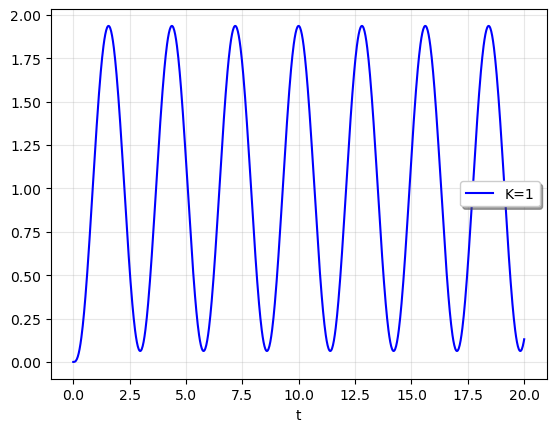

In [2]:
# definindo função transferência
H = TransferFunction(1,[1,6,5,0])

Kc = 30 # por Critério de Rough
MF = feedback(Kc*H, 1) # malha fechada
print(MF)

t = np.linspace(0, 20, 1001)

# Plotando gráfico de resposta degrau para se determinar Tc

plt.figure()
tout, yout1 = step_response(MF, t, X0=0)
plt.plot(tout, yout1, 'b', linewidth=1.5, label='K=1')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

Pelo gráfico determina-se $T_c = 2.8$, assim:

$$T_i = 0.5 T_c \Rightarrow T_i = 1.4 $$

$$T_d = 0.125 T_c \Rightarrow T_d = 0.35 $$

# Plote a curva de resposta ao degrau unitário do sistema em malha fechada.

No handles with labels found to put in legend.


Cpid =  
6.3 s^2 + 18 s + 12.86
----------------------
          s



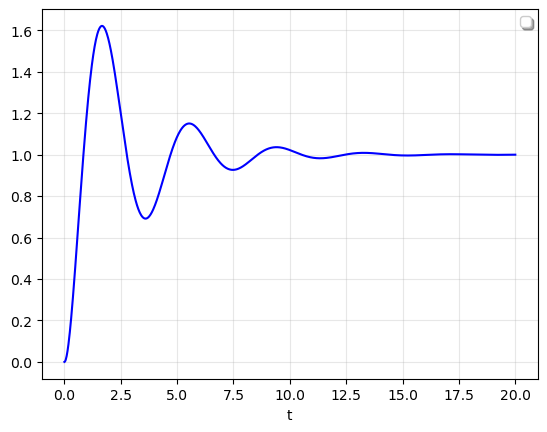

In [3]:
Kc = 30
Tc = 2.8

# Zielgler Nichols

Cpid = TransferFunction(0.075*Kc*Tc*np.convolve([1,4/Tc],[1,4/Tc]),[1,0]);

print('Cpid = ',Cpid)

L = Cpid*H # malha aberta com ZN


t = np.linspace(0, 20, 1001)

sys1 = feedback(1*L, 1) # malha aberta com ZN

plt.figure() # Malha Fechada
tout, yout1 = step_response(sys1, t, X0=0)
plt.plot(tout, yout1, 'b', linewidth=1.5)
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

# Quais os valores do máximo  sobressinal (Mp) e do tempo  de  acomodação  (ts) considerando critério de 2%?

In [4]:
# Determinando o máximo sobressinal a partir do gráfico acima

print("Mp = ",(yout1.max() - 1)*100,"%")

Mp =  62.09282676378236 %


No handles with labels found to put in legend.


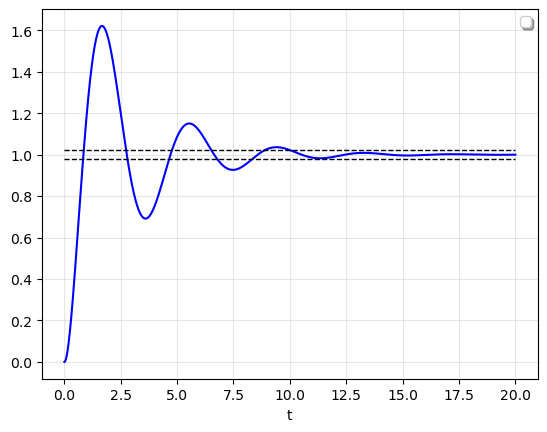

In [5]:
plt.figure() # Malha Fechada
tout, yout1 = step_response(sys1, t, X0=0)
plt.plot(tout, yout1, 'b', linewidth=1.5)
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')

# Delimitando linhas considerando critério de +/- 2% 

j = np.linspace(1.02, 1.02, 1001)
j_2= np.linspace(0.98, 0.98, 1001)
plt.plot(t, j, 'k', linewidth=1.,linestyle="--")
plt.plot(t, j_2, 'k', linewidth=1.,linestyle="--")
plt.show()


Pode-se observar que o valor do tempo de acomodação será ts = 10 s.

# Faça uma  sintonia  fina  do  controlador  para  que  o  máximo  sobressinal  seja  de 25% ou menos.

Cpid =  
18.9 s^2 + 18 s + 3.215
-----------------------
           s



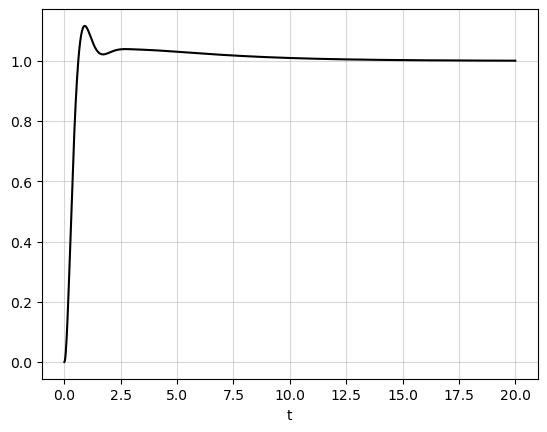

In [6]:
# Considerando Kp = 3 Kp; Ki = Ki e Kd = 0.25 Kd

Kc = 30
Tc = 2.8

# Zielgler Nichols

Cpid = TransferFunction([3*6.3,18,0.25*12.86],[1,0])

print('Cpid = ',Cpid)

L = Cpid*H # malha aberta com ZN

t = np.linspace(0, 20, 1001)

sys2 = feedback(1*L, 1) # malha aberta com ZN

plt.figure() # Malha Fechada
tout, yout2 = step_response(sys2, t, X0=0)
plt.plot(tout, yout2, 'k', linewidth=1.5)
plt.grid(alpha=0.5)
plt.xlabel('t')
plt.show()

In [7]:
print("Mp = ",(yout2.max() - 1)*100,"%")

Mp =  11.61738272102455 %


# Compare as respostas ao degrau unitário do sistema em malha fechada antes e depois da sintonia fina.

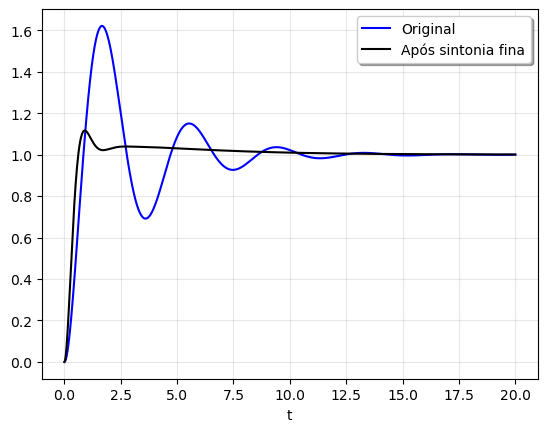

In [8]:
plt.figure() # Malha Fechada

plt.plot(tout, yout1, 'b', linewidth=1.5, label='Original')
plt.plot(tout, yout2, 'k', linewidth=1.5, label='Após sintonia fina')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')

plt.show()